In [94]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/car-details-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/jc425/.cache/kagglehub/datasets/akshaydattatraykhare/car-details-dataset/versions/1


# Data Import


In [95]:
import pandas as pd
import os

data_path = os.path.join(path, "CAR DETAILS FROM CAR DEKHO.csv")
print("Data file path:", data_path)

df = pd.read_csv(data_path)

df.head()

Data file path: /Users/jc425/.cache/kagglehub/datasets/akshaydattatraykhare/car-details-dataset/versions/1/CAR DETAILS FROM CAR DEKHO.csv


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


This dataset is from Kaggle, provided by Akshay Dattatray Khare, and contains detailed information about various brands and models of cars in the Indian market.

| Field Name       | Description                                  |
|------------------|----------------------------------------------|
| name             | Name of the car                              |
| year             | Year of the car when it was bought           |
| selling_price    | Selling price of the car                     |
| km_driven        | Kilometers driven by the car                 |
| fuel             | Required fuel for the car                    |
| seller_type      | Seller type of the car                       |
| transmission     | Transmission of the car                      |
| owner            | Number of previous owners of the vehicle     |




# EDA

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [97]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Missing Values Check

In [98]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Repalce ['name'] with ['brand']

In [99]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [100]:
df['brand'] = df['name'].str.split().str[0]
print("Brand extracted from name:")
print(df['brand'].unique())

Brand extracted from name:
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [101]:
df['brand'] = df['brand'].replace('Land', 'Land Rover')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   brand          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


# Handle duplicates

In [103]:
print(df.duplicated().sum())

df_sorted = df.sort_values(by=list(df.columns))

print(df_sorted[df_sorted.duplicated(keep=False)])

763
                                           name  year  selling_price  \
3912             Ambassador CLASSIC 1500 DSL AC  2005         120000   
4016             Ambassador CLASSIC 1500 DSL AC  2005         120000   
99         Audi A4 2.0 TDI 177 Bhp Premium Plus  2013        1150000   
2578       Audi A4 2.0 TDI 177 Bhp Premium Plus  2013        1150000   
554                     Audi A4 3.0 TDI Quattro  2013        1580000   
...                                         ...   ...            ...   
2936  Volkswagen Vento 1.5 TDI Highline Plus AT  2017         890000   
1628        Volkswagen Vento Diesel Comfortline  2012         215000   
3052        Volkswagen Vento Diesel Comfortline  2012         215000   
478            Volkswagen Vento Diesel Highline  2011         300000   
485            Volkswagen Vento Diesel Highline  2011         300000   

      km_driven    fuel seller_type transmission         owner       brand  
3912      50000  Diesel  Individual       Manual  Seco

In [104]:
df.drop_duplicates(keep='first', inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
 8   brand          3577 non-null   object
dtypes: int64(3), object(6)
memory usage: 279.5+ KB


### Selling Price Distribution

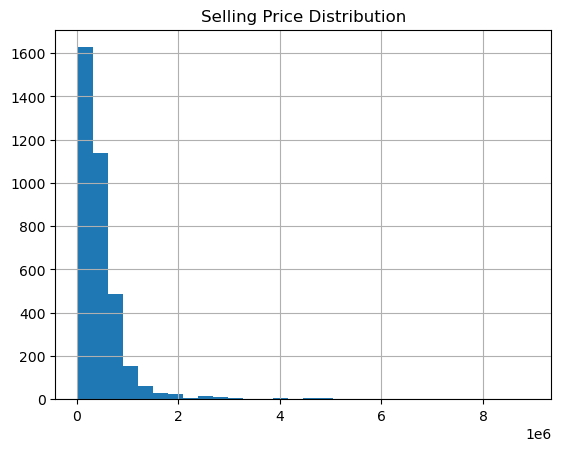

In [106]:
import matplotlib.pyplot as plt
df['selling_price'].hist(bins=30)
plt.title("Selling Price Distribution")
plt.show()

### Categorical Variables Distribution

Count plot for fuel
Count plot for seller_type


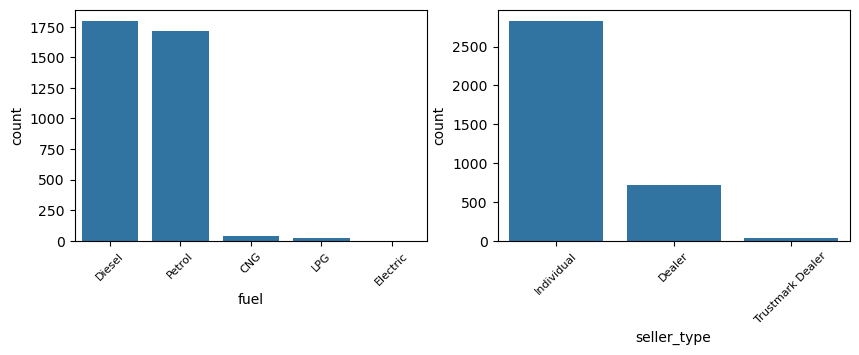

Count plot for transmission
Count plot for owner


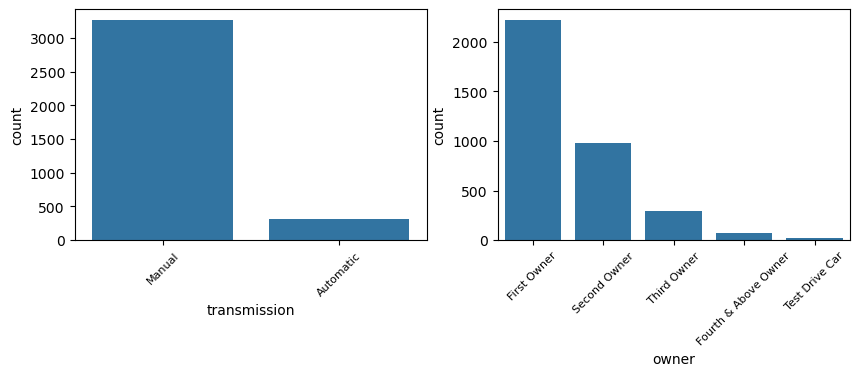

Count plot for brand


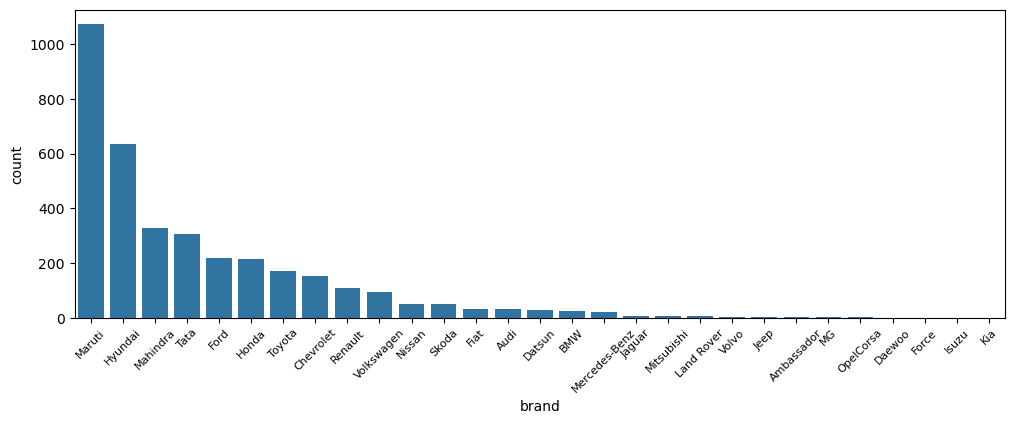

In [107]:
import seaborn as sns

cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
i = 0
while i < len(cat_cols):
    if i == len(cat_cols) - 1:
        fig = plt.figure(figsize=[12, 4])
        plt.subplot(1, 1, 1)
        sns.countplot(x=cat_cols[i], data=df, order=df[cat_cols[i]].value_counts().index)
        print(f"Count plot for {cat_cols[i]}")
        plt.xticks(rotation=45, fontsize=8)
        plt.show()
        i += 1
    else:
        fig = plt.figure(figsize=[10, 3])
        plt.subplot(1, 2, 1)
        sns.countplot(x=cat_cols[i], data=df, order=df[cat_cols[i]].value_counts().index)
        print(f"Count plot for {cat_cols[i]}")
        plt.xticks(rotation=45, fontsize=8)
        i += 1
        plt.subplot(1, 2, 2)
        sns.countplot(x=cat_cols[i], data=df, order=df[cat_cols[i]].value_counts().index)
        print(f"Count plot for {cat_cols[i]}")
        plt.xticks(rotation=45, fontsize=8)
        i += 1
        plt.show()

In [108]:
df['transmission_num'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})

In [109]:
owner_order = {'Test Drive Car': 0,'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
df['owner_num'] = df['owner'].map(owner_order)

In [110]:
df['owner_num'].value_counts()

owner_num
1    2218
2     978
3     289
4      75
0      17
Name: count, dtype: int64

In [111]:
df.drop(columns=['name', 'transmission', 'owner'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              3577 non-null   int64 
 1   selling_price     3577 non-null   int64 
 2   km_driven         3577 non-null   int64 
 3   fuel              3577 non-null   object
 4   seller_type       3577 non-null   object
 5   brand             3577 non-null   object
 6   transmission_num  3577 non-null   int64 
 7   owner_num         3577 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 251.5+ KB


### Distribution of Selling Price by Categorical Variables

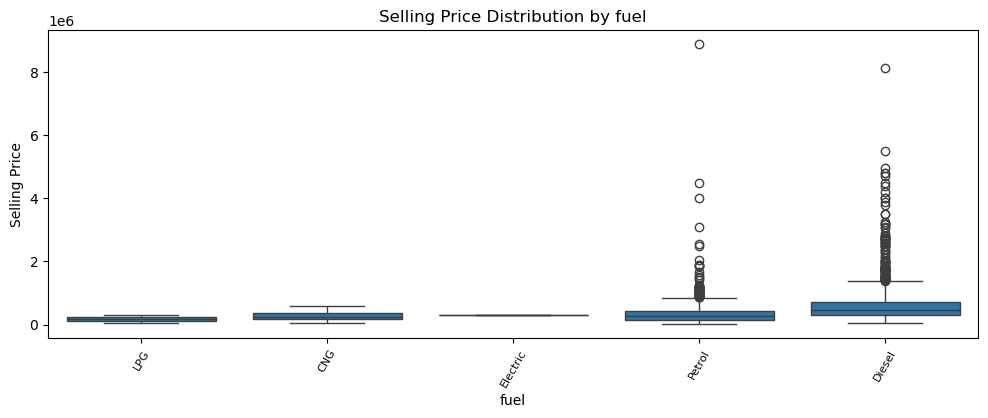

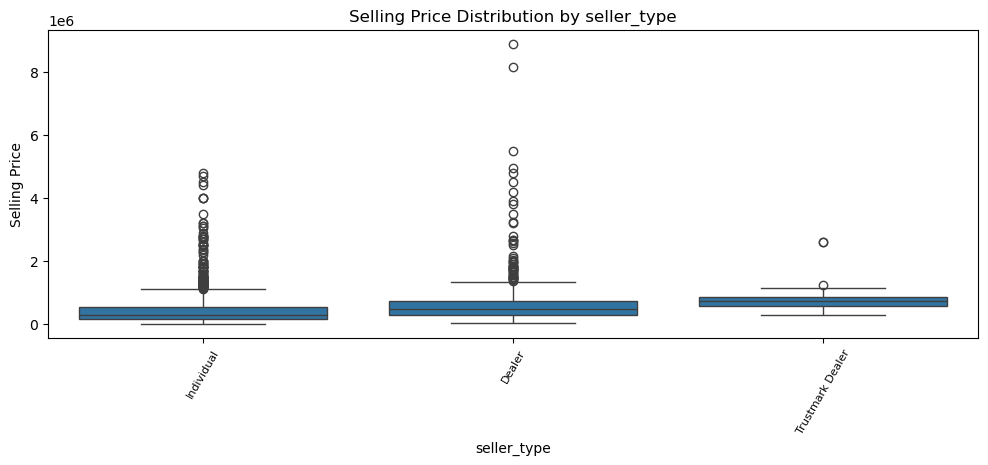

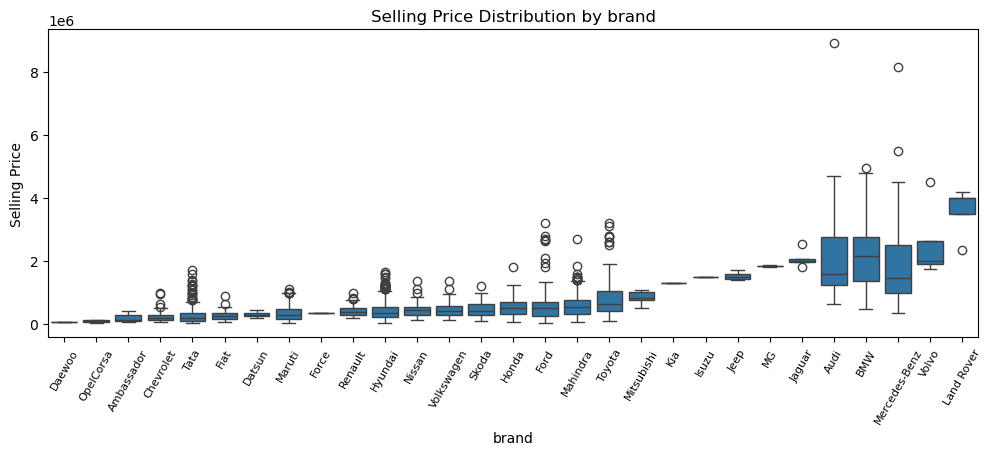

In [112]:
cat_cols = ['fuel', 'seller_type', 'brand']

for col in cat_cols:
    plt.figure(figsize=[12, 4])
    category_order = df.groupby(col)['selling_price'].mean().sort_values().index
    sns.boxplot(x=col, y='selling_price', data=df, order=category_order)
    plt.title(f"Selling Price Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Selling Price")
    plt.xticks(rotation=60, fontsize=8)
    plt.show()

### Numerical Variables Distribution

Numerical Attribution (excluding selling price):


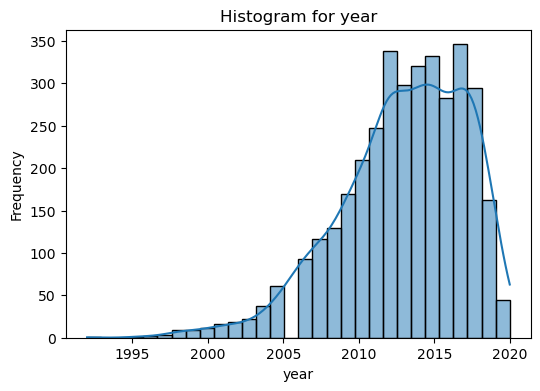

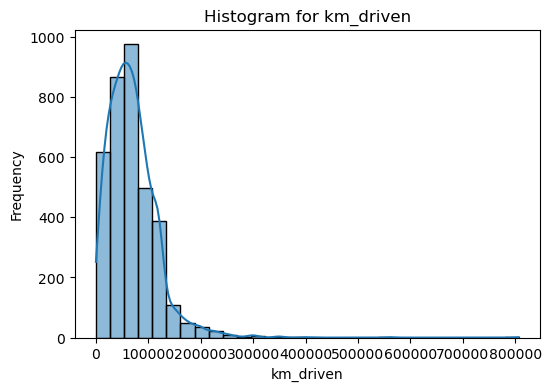

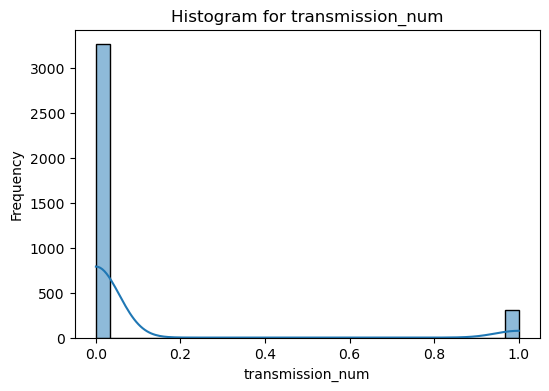

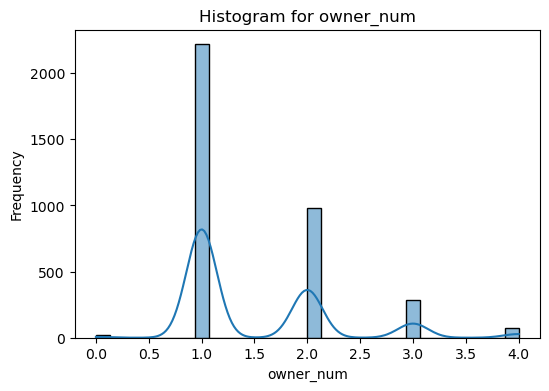

In [113]:
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns
feature_cols = [col for col in num_cols if col != 'selling_price']

print("Numerical Attribution (excluding selling price):")
for col in feature_cols:
    plt.figure(figsize=[6, 4])
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Correlation of Numerical Features with Selling Price

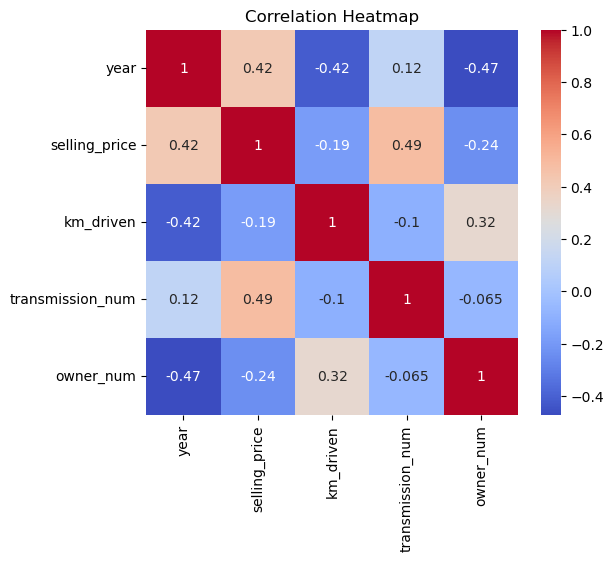

In [114]:
num_df = df.select_dtypes(include='number')  
plt.figure(figsize=[6, 5])
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Correlation with selling price:
selling_price       1.000000
transmission_num    0.486269
year                0.424260
km_driven          -0.187359
owner_num          -0.239919
Name: selling_price, dtype: float64


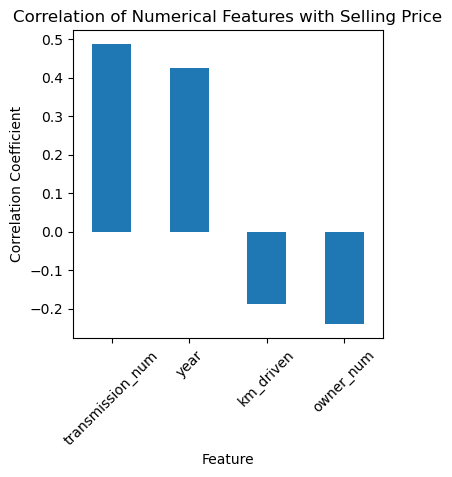

In [115]:
num_df = df.select_dtypes(include='number')
corr_with_price = num_df.corr()['selling_price'].sort_values(ascending=False)

print("Correlation with selling price:")
print(corr_with_price)

plt.figure(figsize=[4, 4])
corr_with_price.drop('selling_price').plot(kind='bar')
plt.title("Correlation of Numerical Features with Selling Price")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature")
plt.xticks(rotation=45, fontsize=10)
plt.show()

- transmission_num (numeric encoding of transmission type) has a correlation of 0.53 with selling price, indicating a strong positive relationship. 
    - Automatic transmission (usually encoded as 1) tends to be more expensive.
- year (vehicle year) has a correlation of 0.41 with selling price, meaning newer cars are generally sold at higher prices.
- km_driven (mileage) has a correlation of -0.19 with selling price, showing a weak negative relationship: the more a car has been driven, the lower its price.
- owner_num (number of owners) has a correlation of -0.22 with selling price, indicating that cars with more previous owners tend to have lower prices, but the effect is moderate.

**Conclusion:**  
- Automatic transmission and newer car year have the strongest positive impact on selling price
- Higher mileage and more owners decrease the price, but their influence is weaker.
        

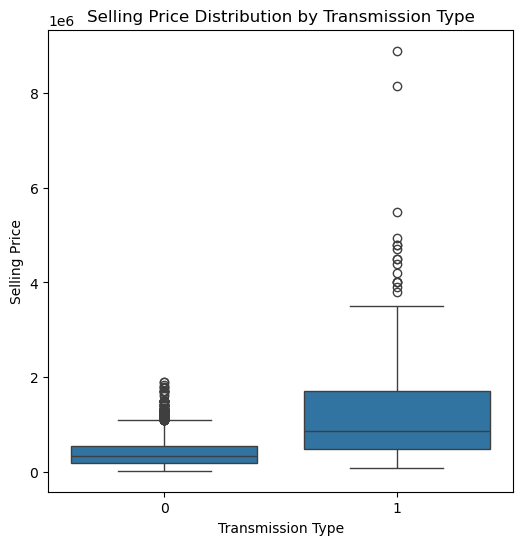

In [116]:
# 0 means Manual, 1 means Automatic

plt.figure(figsize=[6, 6])
sns.boxplot(x='transmission_num', y='selling_price', data=df)
plt.title("Selling Price Distribution by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price")
plt.show()

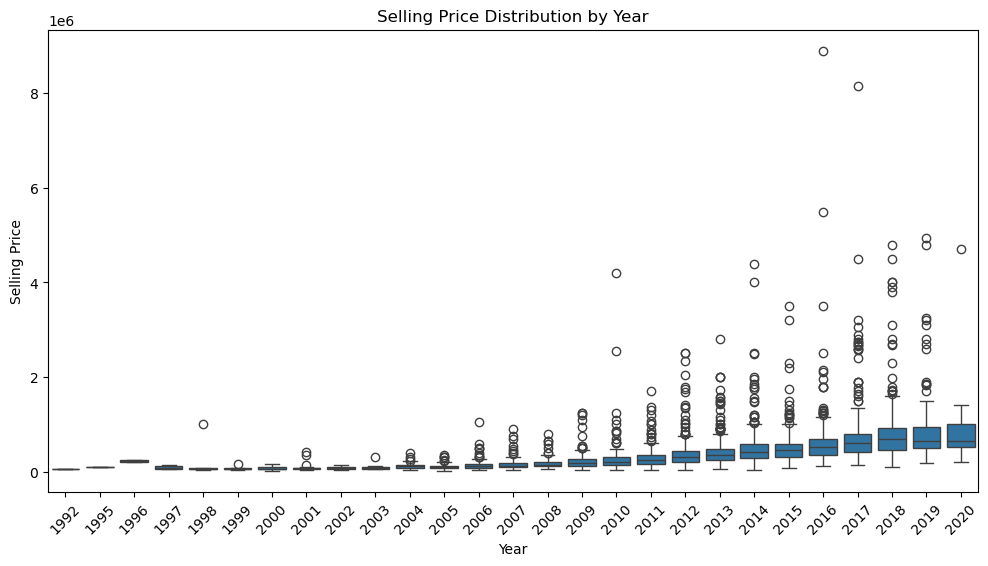

In [117]:
plt.figure(figsize=[12, 6])
sns.boxplot(x='year', y='selling_price', data=df)
plt.title("Selling Price Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.show()

# Get Dummies

In [118]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'brand'], drop_first=True)

In [119]:
df.head()

,year,selling_price,km_driven,transmission_num,owner_num,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,60000,70000,0,1,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,2007,135000,50000,0,1,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,2012,600000,100000,0,1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2017,250000,46000,0,1,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,2014,450000,141000,0,2,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [120]:
df.isnull().sum()

year                            0
selling_price                   0
km_driven                       0
transmission_num                0
owner_num                       0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
brand_Audi                      0
brand_BMW                       0
brand_Chevrolet                 0
brand_Daewoo                    0
brand_Datsun                    0
brand_Fiat                      0
brand_Force                     0
brand_Ford                      0
brand_Honda                     0
brand_Hyundai                   0
brand_Isuzu                     0
brand_Jaguar                    0
brand_Jeep                      0
brand_Kia                       0
brand_Land Rover                0
brand_MG                        0
brand_Mahindra                  0
brand_Maruti                    0
brand_Mercedes

# Train/Test Split

In [121]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
feature_cols = [col for col in df.columns if col != 'selling_price']
X = df[feature_cols]
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Check means and stds before scaling
print('Check means and stds before scaling')
print("Train mean:")
print(X_train.mean())
print("Train std:")
print(X_train.std())

print("Test mean:")
print(X_test.mean())
print("Test std:")
print(X_test.std())

Check means and stds before scaling
Train mean:
year                             2012.959804
km_driven                       69787.506117
transmission_num                    0.084935
owner_num                           1.494932
fuel_Diesel                         0.507864
fuel_Electric                       0.000000
fuel_LPG                            0.006991
fuel_Petrol                         0.473261
seller_type_Individual              0.788535
seller_type_Trustmark Dealer        0.007690
brand_Audi                          0.009088
brand_BMW                           0.007690
brand_Chevrolet                     0.044041
brand_Daewoo                        0.000350
brand_Datsun                        0.009088
brand_Fiat                          0.008039
brand_Force                         0.000350
brand_Ford                          0.059769
brand_Honda                         0.060119
brand_Hyundai                       0.179657
brand_Isuzu                         0.000000
brand_J

# Feature Scaling

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
# Check means and stds after scaling
print('Check means and stds after scaling')
print("Train mean:")
print(X_train_scaled.mean())
print("Train std:")
print(X_train_scaled.std())

print("Test mean:")
print(X_test_scaled.mean())
print("Test std:")
print(X_test_scaled.std())

Check means and stds after scaling
Train mean:
-1.866908262384082e-16
Train std:
0.9597148699373931
Test mean:
-0.0014353276700945195
Test std:
0.916901508494375


# Apply Linear Regression with Polynomial Features

In [126]:
poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the Model

In [127]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [128]:
y_pred = model.predict(X_test_poly)

print(f'y_test.mean(): {y_test.mean()}')
print(f'y_test.std(): {y_test.std()}')
print(f'y_pred.mean(): {y_pred.mean()}')
print(f'y_pred.std(): {y_pred.std()}')

y_test.mean(): 482566.7318435754
y_test.std(): 567964.6913835458
y_pred.mean(): 471244.92735303787
y_pred.std(): 363907.48548689485


$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}i)^2}{\sum{i=1}^{n}(y_i - \bar{y})^2}$$

In [129]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

RMSE: 386085.33526501956
R²: 0.5372665263463003


# Experiment

In [130]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
degrees = range(1, 4)

In [ ]:
train_rmse_errors = []
test_rmse_errors = []
train_r2_scores = []
test_r2_scores = []

alphas = [0.01, 0.1, 1, 10, 100]

for d in degrees:

    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    # RidgeCV
    model = RidgeCV(alphas=alphas, fit_intercept=True, cv=5)
    model.fit(X_train_poly, y_train)
    
    # prediction
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    # calculate RMSE
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    
    # calculate R²
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    
    print(f"degree={d} | Best alpha: {model.alpha_:.4f} | Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")



# Following code does not use RidgeCV, kept for reference
# for d in degrees:

#     poly = PolynomialFeatures(degree=d, include_bias=False)
#     X_train_poly = poly.fit_transform(X_train_scaled)
#     X_test_poly = poly.transform(X_test_scaled)
    
#     # model training
#     model = LinearRegression(fit_intercept=True)
#     model.fit(X_train_poly, y_train)
    
#     # prediction
#     train_pred = model.predict(X_train_poly)
#     test_pred = model.predict(X_test_poly)
    
#     # calculate RMSE
#     train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
#     test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
#     train_rmse_errors.append(train_RMSE)
#     test_rmse_errors.append(test_RMSE)
    
#     # calculate R²
#     train_r2 = r2_score(y_train, train_pred)
#     test_r2 = r2_score(y_test, test_pred)
#     train_r2_scores.append(train_r2)
#     test_r2_scores.append(test_r2)



degree=1 | Best alpha: 100.0000 | Train R²: 0.6589 | Test R²: 0.5340
degree=2 | Best alpha: 100.0000 | Train R²: 0.8283 | Test R²: 0.5287
degree=3 | Best alpha: 100.0000 | Train R²: 0.8979 | Test R²: 0.2036


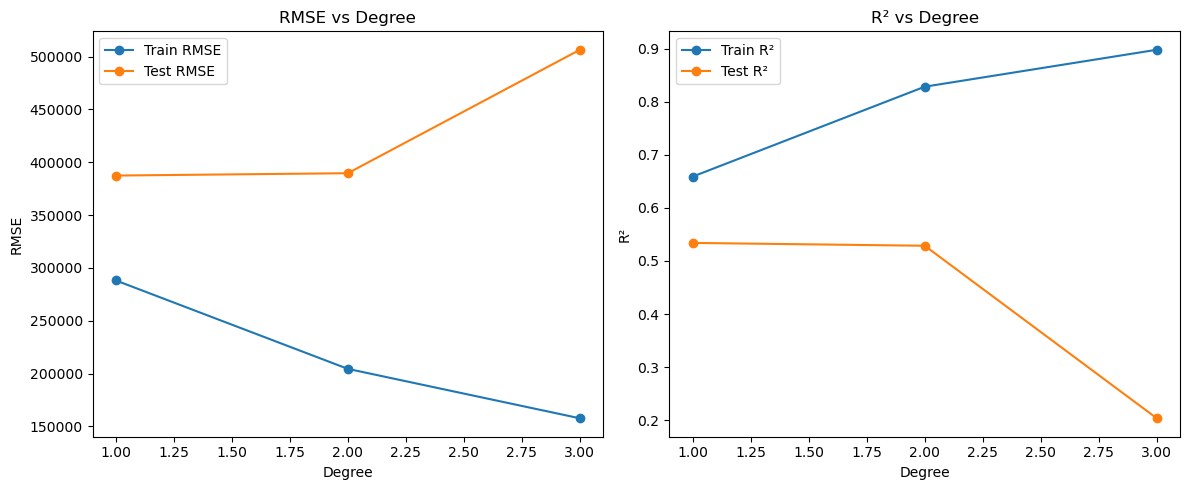

In [137]:
# 绘制RMSE和R²曲线
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, train_rmse_errors, label='Train RMSE', marker='o')
plt.plot(degrees, test_rmse_errors, label='Test RMSE', marker='o')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Degree')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Degree')
plt.ylabel('R²')
plt.title('R² vs Degree')
plt.legend()

plt.tight_layout()
plt.show()

In [134]:
for i, d in enumerate(degrees):
    print(f"degree={d} | Train R²: {train_r2_scores[i]:.4f} | Test R²: {test_r2_scores[i]:.4f}")

degree=1 | Train R²: 0.6589 | Test R²: 0.5340
degree=2 | Train R²: 0.8283 | Test R²: 0.5287
degree=3 | Train R²: 0.8979 | Test R²: 0.2036


Ridge | degree=1 | Best alpha: 0.3793 | Train R²: 0.6587 | Test R²: 0.5375


/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e+13, tolerance: 5.402e+10
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.997e+13, tolerance: 5.402e+10
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features o

Lasso | degree=1 | Best alpha: 88.5867 | Train R²: 0.6592 | Test R²: 0.5360


/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.84073e-27): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.39922e-27): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.3861e-27): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.85238e-26): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matri

Ridge | degree=2 | Best alpha: 48.3293 | Train R²: 0.7381 | Test R²: 0.5830


/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.906e+13, tolerance: 5.711e+10
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.242e+13, tolerance: 5.711e+10
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features o

Lasso | degree=2 | Best alpha: 297.6351 | Train R²: 0.7786 | Test R²: 0.4564


/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squ

Ridge | degree=3 | Best alpha: 0.0100 | Train R²: -0.3693 | Test R²: -0.4890


/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.184e+13, tolerance: 5.711e+10
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.119e+13, tolerance: 5.711e+10
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/my_python311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

Lasso | degree=3 | Best alpha: 1000.0000 | Train R²: 0.8558 | Test R²: 0.1659


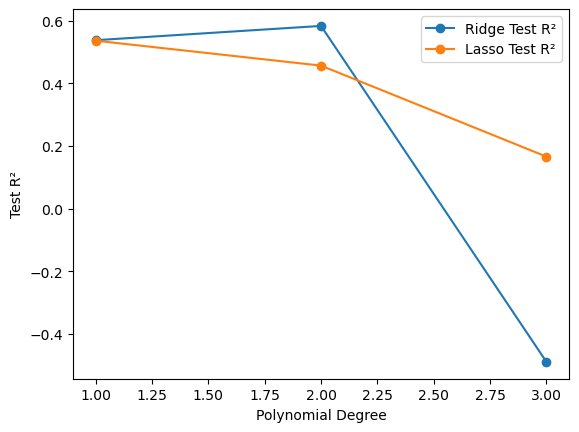

In [140]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import r2_score

degrees = [1, 2, 3]
ridge_train_r2_scores = []
ridge_test_r2_scores = []
lasso_train_r2_scores = []
lasso_test_r2_scores = []

for degree in degrees:
    # 多项式特征转换
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # RidgeCV
    ridge = RidgeCV(alphas=np.logspace(-2, 3, 20), cv=5)
    ridge.fit(X_poly_train, y_train)
    ridge_train_r2 = ridge.score(X_poly_train, y_train)
    ridge_test_r2 = ridge.score(X_poly_test, y_test)
    ridge_train_r2_scores.append(ridge_train_r2)
    ridge_test_r2_scores.append(ridge_test_r2)
    print(f"Ridge | degree={degree} | Best alpha: {ridge.alpha_:.4f} | Train R²: {ridge_train_r2:.4f} | Test R²: {ridge_test_r2:.4f}")

    # LassoCV
    lasso = LassoCV(alphas=np.logspace(-2, 3, 20), cv=5, max_iter=5000)
    lasso.fit(X_poly_train, y_train)
    lasso_train_r2 = lasso.score(X_poly_train, y_train)
    lasso_test_r2 = lasso.score(X_poly_test, y_test)
    lasso_train_r2_scores.append(lasso_train_r2)
    lasso_test_r2_scores.append(lasso_test_r2)
    print(f"Lasso | degree={degree} | Best alpha: {lasso.alpha_:.4f} | Train R²: {lasso_train_r2:.4f} | Test R²: {lasso_test_r2:.4f}")

# 可选：画图对比
import matplotlib.pyplot as plt
plt.plot(degrees, ridge_test_r2_scores, label='Ridge Test R²', marker='o')
plt.plot(degrees, lasso_test_r2_scores, label='Lasso Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Test R²')
plt.legend()
plt.show()

In [142]:
# 输出 RidgeCV 结果
print("RidgeCV: ")
for i, degree in enumerate(degrees):
    print(f"degree={degree} | Best alpha: {ridge_train_r2_scores[i]:.4f} | Train R²: {ridge_train_r2_scores[i]:.4f} | Test R²: {ridge_test_r2_scores[i]:.4f}")

# 输出 LassoCV 结果
print("\nLassoCV: ")
for i, degree in enumerate(degrees):
    print(f"degree={degree} | Best alpha: {lasso.alpha_:.4f} | Train R²: {lasso_train_r2_scores[i]:.4f} | Test R²: {lasso_test_r2_scores[i]:.4f}")

RidgeCV: 
degree=1 | Best alpha: 0.6587 | Train R²: 0.6587 | Test R²: 0.5375
degree=2 | Best alpha: 0.7381 | Train R²: 0.7381 | Test R²: 0.5830
degree=3 | Best alpha: -0.3693 | Train R²: -0.3693 | Test R²: -0.4890

LassoCV: 
degree=1 | Best alpha: 1000.0000 | Train R²: 0.6592 | Test R²: 0.5360
degree=2 | Best alpha: 1000.0000 | Train R²: 0.7786 | Test R²: 0.4564
degree=3 | Best alpha: 1000.0000 | Train R²: 0.8558 | Test R²: 0.1659


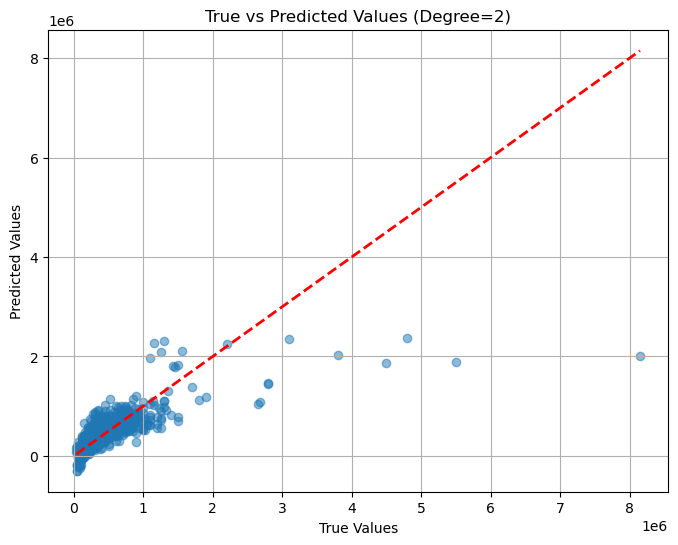

RMSE: 386085.34
R²: 0.5373


In [ ]:

# Train without regularization for degree=2 and plot results
poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


model = LinearRegression(fit_intercept=True)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Degree=2)')
plt.grid(True)
plt.show()


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

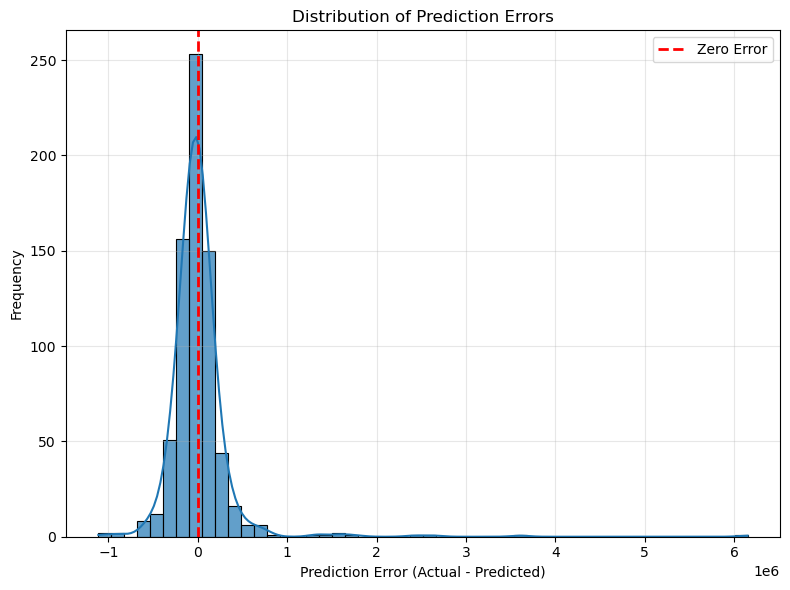

Mean Error: 11321.80
Standard Deviation of Errors: 385919.30
Min Error: -1110608.29
Max Error: 6148303.57


In [139]:
errors = y_test - y_pred

# 创建预测误差分布图
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=50, kde=True, alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 打印误差统计信息
print(f"Mean Error: {np.mean(errors):.2f}")
print(f"Standard Deviation of Errors: {np.std(errors):.2f}")
print(f"Min Error: {np.min(errors):.2f}")
print(f"Max Error: {np.max(errors):.2f}")